# Generate data

In [1]:
import numpy as np
def generate_two_classes(num_observations):
    # num_observations = per class
    x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
    x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

    features = np.vstack((x1, x2)).astype(np.float32)
    labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))
    return features, labels

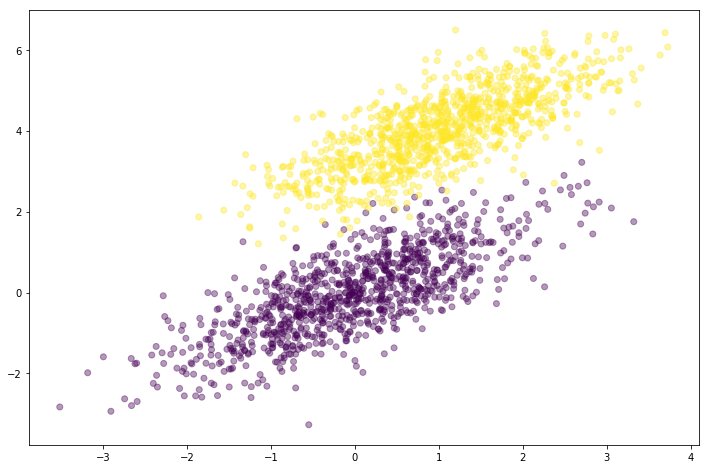

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
x, y = generate_two_classes(1000)
plt.scatter(x[:, 0], x[:, 1],c = y, alpha = .4)

# Vanilla Logistic Regression

In [3]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

def ll_gradient(features, target, predictions):
    return np.dot(features.T, target - predictions)

class LogisticRegression:    
    weights = None
    
    def fit(self, features, target, num_steps, lr, add_intercept = False):
        if add_intercept:
            intercept = np.ones((features.shape[0], 1))
            features = np.hstack((intercept, features))

        weights = np.zeros(features.shape[1])

        for step in range(num_steps):
            scores = np.dot(features, weights)
            predictions = sigmoid(scores)

            gradient = ll_gradient(features, target, predictions)
            weights += lr * gradient

            # Print log-likelihood every so often
            if step % 10000 == 0:
                print(log_likelihood(features, target, weights))

        self.weights = weights
  
    def predict(self, features):
        scores = np.dot(np.hstack((np.ones((features.shape[0], 1)),
                                 features)), self.weights)
        return np.round(sigmoid(scores))

In [4]:
LogR = LogisticRegression()
LogR.fit(x, y, num_steps = 50000, lr = 5e-5, add_intercept=True)

-1196.86095311
-43.9224039123
-38.3577150949
-36.2863190766
-35.2113984475


In [5]:
preds = LogR.predict(x)
print('Accuracy from scratch: {0}'.format((preds == y).sum().astype(float) / len(preds)))

Accuracy from scratch: 0.994


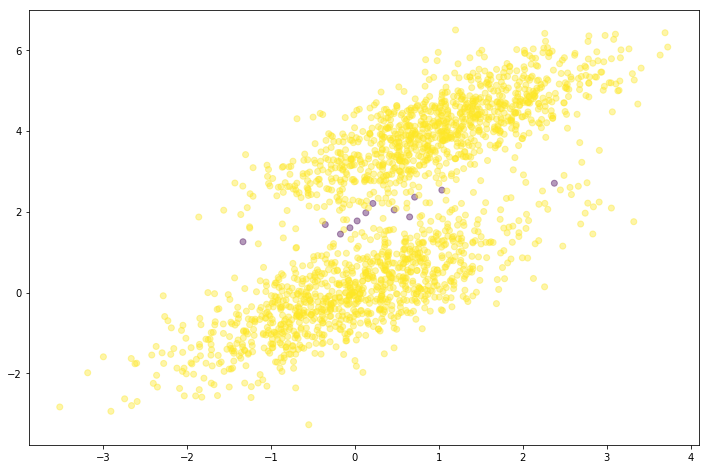

In [6]:
plt.figure(figsize=(12,8))
plt.scatter(x[:, 0], x[:, 1],
            c = preds==y, alpha = .4)

# Sk-learn

In [7]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(x, y)

LogisticRegression(C=1000000000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [8]:
print(clf.intercept_, clf.coef_)

[-14.52858102] [[-4.43185004  8.15155799]]


In [9]:
preds = clf.predict(x)

In [10]:
print('Accuracy from sk-learn: {0}'.format(clf.score(x, y)))

Accuracy from sk-learn: 0.994


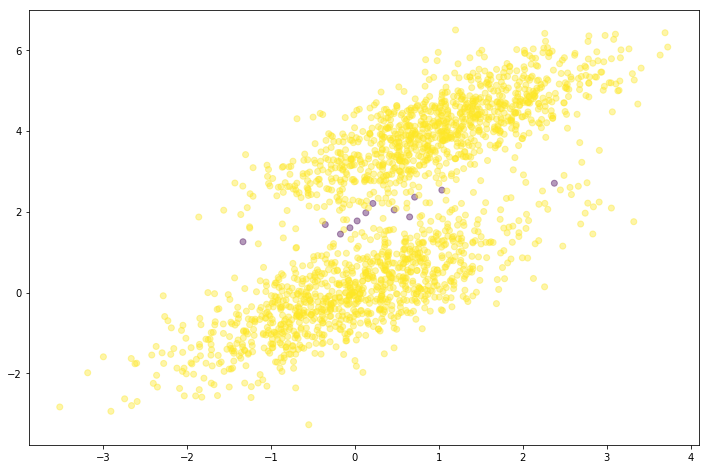

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(x[:, 0], x[:, 1],
            c = preds==y, alpha = .4)

# Notes

It is a regression analysis to find when dependant variable is binary.

LR introduces an extra non-linearity over a linear classifier, f(x) = wx + b, by using a logistic (or sigmoid) function, σ(). • The LR classifier is defined as 
σ (f(xi)) ( ≥ 0.5, yi = +1; < 0.5 yi = −1 where σ(f(x)) = 1/ 1+e−f(x)

## Objective function
We maximize likelihood of predicting correct classes, and it does not have a closed form solution. Can use SGD as optimization algorithm

## Learning
For num_steps:

scores = x * weights 
<br>preds = sigmoid(scores)
<br>weights += learning_rate * gradient(x, preds, target)

## Assumptions
* Decision boundary is linear: Best way to know if a logistic regression works for a given problem is to just try it out.
* No multicollinearity: However, there is the option to include interaction effects of categorical variables in the analysis and the model.
* Tests for multi collinearity: VIF, Eigen value based collinearity index, 
* Needs more obersvations per feature. A general guideline is that you need at minimum of 10 cases with the least frequent outcome for each independent variable in your model. For example, if you have 5 independent variables and the expected probability of your least frequent outcome is .10, then you would need a minimum sample size of 500 (10*5 / .10).

## Pros:
* Simple first model for classification
* LR gives calibrated probabilities that can be interpreted as confidence in a decision.
* LR gives us an unconstrained, smooth objective. 

## Cons: 
See assumptions

## Misc:
* Ordinal logistic regression: Outputs are ordered, size of cup
* Multinomial logistic regression: Output multi classes with no order